<a href="https://colab.research.google.com/github/Tavo826/DataScience/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline
os.chdir('/content/drive/MyDrive/Colab Notebooks/Data Science/Detección de fraude tarjetas de crédito')

## Analizando los datos

El conjunto de datos representa transacciones realizadas en 2 días, en los que se tuvo 492 fraudes. El conjunto de datos está altamente desbalanceado, la clase positiva (frauds) representa el 0.172% de todas las transacciones.

Se tiene un archivo con 284807 transacciones realizadas por 28 usuarios. Contiene solamente variables numéricas que son el resultado de una transformación PCA.

**Time:**  es el número de segundos trasncurridos entre esta transacción y la primera transacción en el conjunto de datos
**V1...V28:** puede ser el resultado de una reducción de la dimensionalidad de PCA para proteger las identidades de los usuarios y las funciones sensibles
**Amount:** 


In [ ]:
df = pd.read_csv('creditcard.csv')
print(df.shape)
df.head(10)

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#Datos de no fraude y datos de fraude
class_names = {0: 'Not Fraud', 1: 'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


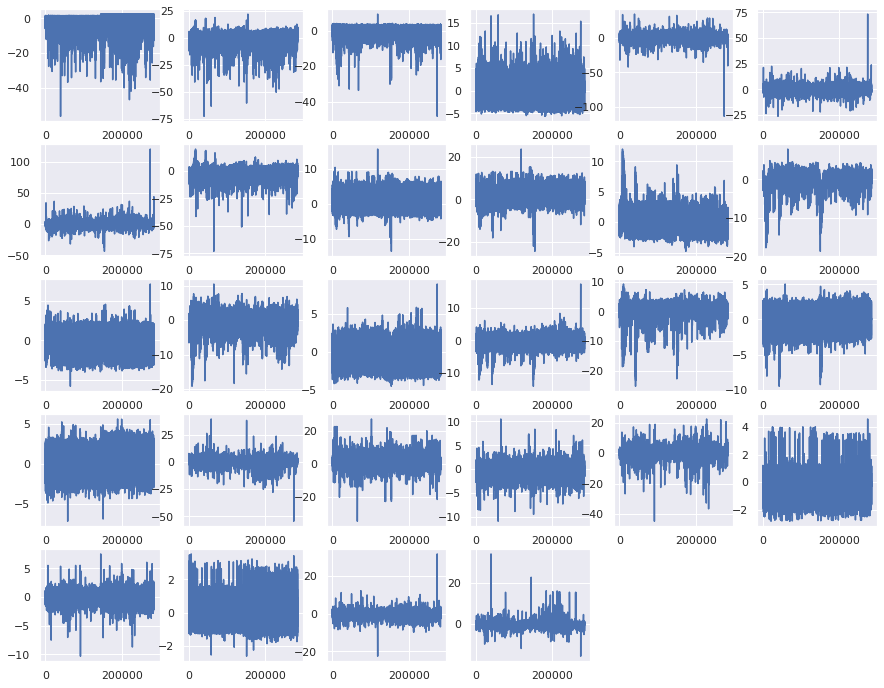

In [ ]:
#Graficando las variables
fig = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1); plt.plot(df.V1);
plt.subplot(5, 6, 2); plt.plot(df.V2);
plt.subplot(5, 6, 3); plt.plot(df.V3);
plt.subplot(5, 6, 4); plt.plot(df.V4);
plt.subplot(5, 6, 5); plt.plot(df.V5);
plt.subplot(5, 6, 6); plt.plot(df.V6);
plt.subplot(5, 6, 7); plt.plot(df.V7);
plt.subplot(5, 6, 8); plt.plot(df.V8);
plt.subplot(5, 6, 9); plt.plot(df.V9);
plt.subplot(5, 6, 10); plt.plot(df.V10);
plt.subplot(5, 6, 11); plt.plot(df.V11);
plt.subplot(5, 6, 12); plt.plot(df.V12);
plt.subplot(5, 6, 13); plt.plot(df.V13);
plt.subplot(5, 6, 14); plt.plot(df.V14);
plt.subplot(5, 6, 15); plt.plot(df.V15);
plt.subplot(5, 6, 16); plt.plot(df.V16);
plt.subplot(5, 6, 17); plt.plot(df.V17);
plt.subplot(5, 6, 18); plt.plot(df.V18);
plt.subplot(5, 6, 19); plt.plot(df.V19);
plt.subplot(5, 6, 20); plt.plot(df.V20);
plt.subplot(5, 6, 21); plt.plot(df.V21);
plt.subplot(5, 6, 22); plt.plot(df.V22);
plt.subplot(5, 6, 23); plt.plot(df.V23);
plt.subplot(5, 6, 24); plt.plot(df.V24);
plt.subplot(5, 6, 25); plt.plot(df.V25);
plt.subplot(5, 6, 26); plt.plot(df.V26);
plt.subplot(5, 6, 27); plt.plot(df.V27);
plt.subplot(5, 6, 28); plt.plot(df.V28);

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30:].columns
print(feature_names)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [ ]:
data_features = df[feature_names]
data_target = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, 
                                                    train_size=0.7, test_size=0.3, random_state=1)

print('Tamaño de X_train: {X_train}'.format(X_train = len(X_train)))
print('Tamaño de X_train: {X_test}'.format(X_test = len(X_test)))
print('Tamaño de y_train: {y_train}'.format(y_train = len(y_train)))
print('Tamaño de y_test: {y_test}'.format(y_test = len(y_test)))

Tamaño de X_train: 199364
Tamaño de X_train: 85443
Tamaño de y_train: 199364
Tamaño de y_test: 85443


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils.multiclass import unique_labels

In [ ]:
#Entrenando el modelo
model = LogisticRegression(max_iter=200, verbose=10, n_jobs=-1)
model.fit(X_train, y_train.values.ravel())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   30.7s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=10,
                   warm_start=False)

In [ ]:
#Realizando predicción
pred = model.predict(X_test)

In [ ]:
unique_labels(y_test, pred)

array([0, 1])

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False,
                          title=None, cmap=plt.cm.Blues):
  
  if not title:
    if normalize:
      title = 'Normalized confusion matrix'
    else:
      title = 'Confusion matrix, without normalization'
  
  #Calulando la matriz de confusión
  cm = confusion_matrix(y_true, y_pred)
  print(cm)
  #Solo se usan las etiquetas que aparecen en los datos
  #classes = classes[unique_labels(y_true, y_pred)]
  if normalize: cm = 100 * cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  fig, ax = plt.subplots()
  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(im, ax=ax)

  #mostrando las etiquetas
  ax.set(xticks = np.arange(cm.shape[1]),
         yticks = np.arange(cm.shape[0]),
         xticklabels = classes, yticklabels=classes, 
         title = title,
         ylabel = 'True label',
         xlabel = 'Predicted label')
  
  #rotando los ejes
  plt.setp(ax.get_xticklabels(), rotation=45, ha='right',
           rotation_mode='anchor')
  
  #Se recorren las dimensiones de los datos y se crean las anotaciones
  fmt = '.1f' if normalize else 'd'
  thresh = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      s = format(cm[i, j],'.1f') + "$\pm$" + format(np.zeros(cm.shape)[i, j],'.1f')
      ax.text(j, i, s,ha="center", va="center",
              color="white" if cm[i, j] > thresh else "black",fontsize=12)
  fig.tight_layout()
  return ax

[[85293    15]
 [   58    77]]


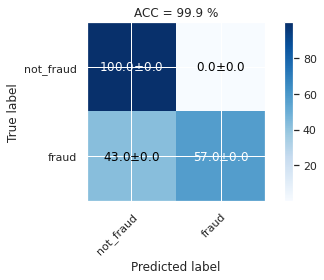

              precision    recall  f1-score   support

   not_fraud       1.00      1.00      1.00     85308
       fraud       0.84      0.57      0.68       135

    accuracy                           1.00     85443
   macro avg       0.92      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#Analizando los resultados
class_names = ['not_fraud', 'fraud']

#Matriz de confusión
acc = accuracy_score(y_test, pred)
plot_confusion_matrix(y_test, pred,
                      classes=class_names,
                      normalize=True,
                      title='ACC = %.1f %%' % (100*acc))

plt.show()

cr = classification_report(y_test, pred,
                           labels = range(len(class_names)),
                           target_names = class_names)
print(cr)